In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('iris.csv')

encoder = OrdinalEncoder()


labels = data.columns
data = encoder.fit_transform(data) 
data = pd.DataFrame(encoder.fit_transform(data), columns=labels)
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.00000,150.000000,150.000000
mean,15.386667,9.540000,18.20000,8.986667,1.000000
std,8.175743,4.300195,11.64866,6.405730,0.819232
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,8.000000,7.000000,6.00000,2.000000,0.000000
50%,15.000000,9.000000,19.50000,9.000000,1.000000
75%,21.000000,12.000000,27.00000,14.000000,2.000000
max,34.000000,22.000000,42.00000,21.000000,2.000000


<Axes: >

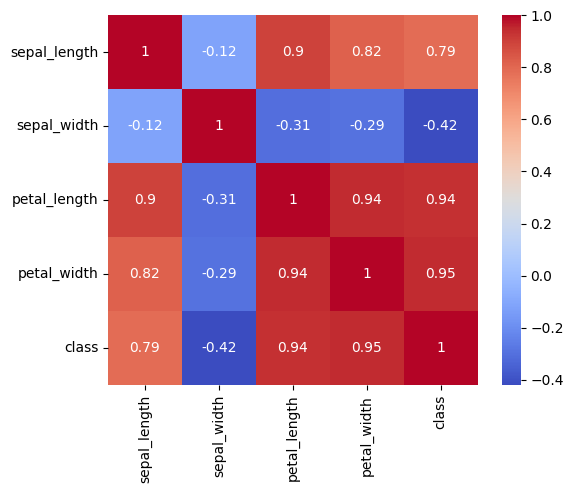

In [39]:
#Statistical Analysis and cleanup
import seaborn as sns
from scipy import stats

data = data[(np.abs(stats.zscore(data['sepal_length'])) < 3)]
data = data[(np.abs(stats.zscore(data['sepal_width'])) < 3)]
data = data[(np.abs(stats.zscore(data['petal_length'])) < 3)]
data = data[(np.abs(stats.zscore(data['petal_width'])) < 3)]

corrmat = data.corr()
sns.heatmap(corrmat, annot=True, cmap='coolwarm', square=True)



In [40]:
Y = data['class']
X = data.drop('class', axis=1)

In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
DT = DecisionTreeClassifier(max_depth=3, random_state=42)


# Perform 10-fold cross-validation
cv_scores = cross_val_score(DT, X, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max Decision Tree score: {cv_scores.max()}")


Max Decision Tree score: 1.0


In [50]:
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
# 
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max KNN score: {cv_scores.max()}")


Max KNN score: 1.0


In [56]:
#SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Find best parameters using Hyperparameter Tuning

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],
#     'kernel': ['linear', 'rbf', 'poly']
# }
# svc = SVC()
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
#                              scoring='accuracy', cv=10, verbose=2, n_jobs=-1)
# grid_search.fit(X_scaled, Y)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# implement best_params

svc = SVC(C=1, gamma=0.1, kernel= 'rbf')
cv_scores = cross_val_score(svc, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max SVC score: {cv_scores.max()}")


Max SVC score: 1.0


In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), [0, 1, 2, 3]),  # Scale all features for SVC and KNN
        ('none', 'passthrough', [0, 1, 2, 3])  # Pass through the original features for Decision Tree
    ]
)

base_models = [
    ('svc', Pipeline(steps=[('preprocessor', preprocessor), ('svc', SVC(probability=True))])),
    ('decision_tree', DecisionTreeClassifier()),
    ('knn', Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier())]))
]

# Create the meta-model
meta_model = RandomForestClassifier(n_estimators=50)

stacked_pipeline = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=10
)

cv_scores = cross_val_score(stacked_pipeline, X, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max stacked pipleine score: {cv_scores.max()}")


Max stacked pipleine score: 1.0
